# Matrix Decompositions

In [1]:
import numpy as np
np.set_printoptions(precision=5, suppress=True)

## Determinant

In [2]:
np.linalg.det(np.random.uniform(-10, 10, (10, 10)))

49337994655.89215

For a triangular matrix, the determinant is the product of the diagonal elements:

In [3]:
upper_triangle = np.array([
  [2, 4, 5, 6, 7],
  [0, 9, 3, 6, 2],
  [0, 0, 5, 2, 7],
  [0, 0, 0, 8, 7],
  [0, 0, 0, 0, 1],
])

det = np.linalg.det(upper_triangle)
diagonal = np.diagonal(upper_triangle)
prod = np.prod(diagonal)

np.testing.assert_allclose(det, prod)

## Trace

The trace is the sum of the diagonal elements:

In [4]:
trace = np.trace(upper_triangle)
sum = np.sum(diagonal)

assert(trace == sum)

## Positive Definite Matrices

A square matrix is called positive definite if it is symmetric and all its eigenvalues $\lambda$ are positive, that is $\lambda$ > 0.

In [5]:
def is_positive_def(M):
  eigvals = np.linalg.eigvals(M)
  print(eigvals)
  np.testing.assert_array_equal(M, M.T)
  return np.all(eigvals > 0)

M1 = np.array([
  [2, 3, 1],
  [3, 2, 5],
  [1, 5, 9]
])

M2 = np.array([
  [2, -1, 0],
  [-1, 2, -1],
  [0, -1, 2]
])

print(is_positive_def(M1))
print(is_positive_def(M2))

[12.13274  2.82325 -1.95599]
False
[3.41421 2.      0.58579]
True


## Cholesky Decomposition

In [6]:
M = np.array([
  [2, -1, 0],
  [-1, 2, -1],
  [0, -1, 2]
])

L = np.linalg.cholesky(M)

print(L)

reconstruct = L @ L.T

np.testing.assert_allclose(M, reconstruct)

[[ 1.41421  0.       0.     ]
 [-0.70711  1.22474  0.     ]
 [ 0.      -0.8165   1.1547 ]]


In [7]:
det1 = np.prod(np.square(np.diagonal(L)))
det2 = np.linalg.det(M)

np.testing.assert_allclose(det1, det2)

## Eigendecomposition of a Matrix

* **Step 1:** Compute eigenvalues and eigenvectors.
* **Step 2:** Check for existence.
* **Step 3:** Construct the matrix $P$ to diagonalize $A$.

**Theorem:** Eigenvectors corresponding to distinct eigenvalues are linearly independent.

In [8]:
A = np.random.uniform(-10, 10, (5, 5))

eig = np.linalg.eig(A)

In [9]:
P = eig.eigenvectors

D = np.linalg.inv(P) @ A @ P
D

array([[ 2.18332+13.95137j, -0.      +0.j     ,  0.      -0.j     ,
         0.      +0.j     ,  0.      +0.j     ],
       [-0.      -0.j     ,  2.18332-13.95137j,  0.      -0.j     ,
         0.      +0.j     ,  0.      -0.j     ],
       [-0.      -0.j     ,  0.      -0.j     , -6.48896 +7.2687j ,
        -0.      +0.j     ,  0.      +0.j     ],
       [-0.      +0.j     ,  0.      +0.j     , -0.      -0.j     ,
        -6.48896 -7.2687j ,  0.      -0.j     ],
       [ 0.      +0.j     ,  0.      -0.j     , -0.      -0.j     ,
        -0.      +0.j     ,  0.3635  +0.j     ]])

In [10]:
reconstruct = P @ D @ np.linalg.inv(P)
np.testing.assert_allclose(A, reconstruct)
print(A)
print(reconstruct)

[[-1.95137 -7.35482  9.55568  5.02773 -6.7138 ]
 [ 7.76116  6.58883  3.90552 -8.03237 -2.97388]
 [-7.70825 -8.44984  0.03565  7.97814  4.33727]
 [-8.45358  9.80642  2.20907 -5.20743  0.7514 ]
 [ 3.00928 -7.38188 -1.76163  7.75282 -7.71344]]
[[-1.95137-0.j -7.35482-0.j  9.55568-0.j  5.02773+0.j -6.7138 -0.j]
 [ 7.76116+0.j  6.58883-0.j  3.90552+0.j -8.03237+0.j -2.97388+0.j]
 [-7.70825-0.j -8.44984+0.j  0.03565-0.j  7.97814-0.j  4.33727+0.j]
 [-8.45358-0.j  9.80642+0.j  2.20907+0.j -5.20743+0.j  0.7514 +0.j]
 [ 3.00928+0.j -7.38188-0.j -1.76163-0.j  7.75282+0.j -7.71344-0.j]]


## Singular Value Decomposition

It can be applied to all matrices, not only to square matrices, and it always exists.

In [11]:
def matrix_is_orthogonal(A):
  I = np.identity(A.shape[0])
  res = A @ A.T
  return np.allclose(res, I)

In [12]:
M = np.array([
  [1, 2, 3, 4, 5],
  [4, 2, -1, 6, -10],
  [-10, 3, 5, -6, 1]
])

svd = np.linalg.svd(M)

print(svd.U)
print(svd.S)
print(svd.Vh)

[[ 0.04339 -0.49939 -0.86529]
 [-0.68072  0.61917 -0.39147]
 [ 0.73126  0.606   -0.31308]]
[15.80032  9.52603  6.52723]
[[-0.6324   0.05817  0.28273 -0.5252   0.49083]
 [-0.42859  0.216    0.09581 -0.2014  -0.84848]
 [ 0.10718 -0.52898 -0.57755 -0.60233 -0.11104]
 [-0.58058 -0.57972 -0.1513   0.55131 -0.00226]
 [-0.26043  0.57798 -0.7446   0.12983  0.16379]]


In [13]:
assert(matrix_is_orthogonal(svd.U))
assert(matrix_is_orthogonal(svd.Vh))
n, m = M.shape
assert(svd.U.shape == (n, n))
assert(svd.Vh.shape == (m, m))

Padding with zeros if necessary so that the matrix has the same dimensions as the original matrix.

In [14]:
S = np.hstack((np.diag(svd.S), np.zeros((3, 2))))

reconstruct = svd.U @ S @ svd.Vh

print(M)
print(reconstruct)

np.testing.assert_allclose(M, reconstruct)

[[  1   2   3   4   5]
 [  4   2  -1   6 -10]
 [-10   3   5  -6   1]]
[[  1.   2.   3.   4.   5.]
 [  4.   2.  -1.   6. -10.]
 [-10.   3.   5.  -6.   1.]]


## Matrix Approximation

In [15]:
from PIL import Image

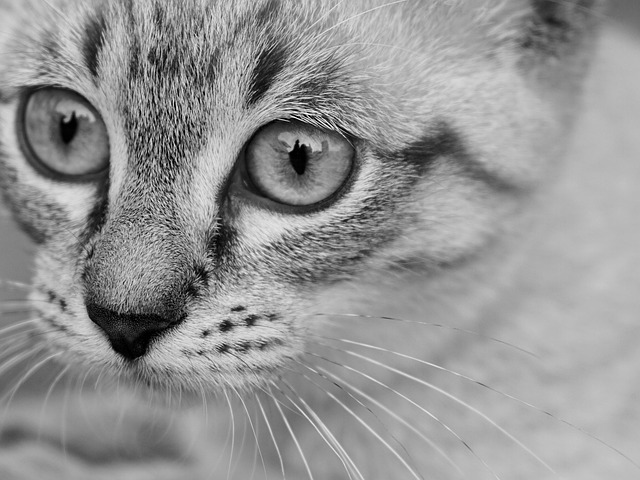

In [16]:
image = Image.open('./data/cat.jpg').convert('L')
image

In [17]:
def normalize_colors(A):
  A = A.copy()
  min = np.min(A)
  max = np.max(A)
  return ((A - min) / (max - min)) * 255

def compress_image(svd, k):
  U = svd.U[:, :k]
  S = np.diag(svd.S[:k])
  V = svd.Vh[:k, :]
  return normalize_colors(U @ S @ V)

def compress_image2(svd, k):
  res = np.zeros((svd.U.shape[0], svd.Vh.shape[0]))
  for i in range(k):
    u = svd.U[:, i:i+1]
    s = svd.S[i]
    v = svd.Vh[i:i+1, :]
    res += s * (u @ v)
  return normalize_colors(res)

In [18]:
svd = np.linalg.svd(image)

Both ways are equivalent.

In [19]:
res1 = compress_image(svd, 15)
res2 = compress_image2(svd, 15)

np.testing.assert_allclose(res1, res2)

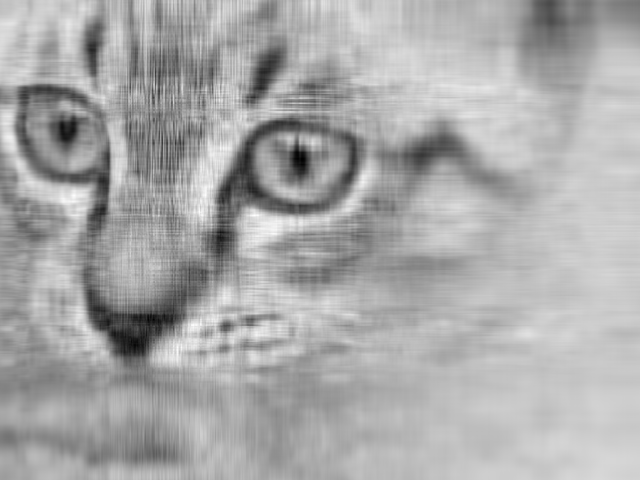

In [24]:
new_image = compress_image(svd, 15)
Image.fromarray(new_image.astype(np.uint8), 'L')